## notebook set up

In [1]:
# adjust plot size rendered inline
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 300)

In [2]:
setwd("..")

In [4]:
library(tidyverse, warn.conflicts = F)
library(DESeq2, warn.conflicts = F)

## read in counts

In [5]:
counts <- read_tsv("outputs/counts/raw_counts.tsv", show_col_types = F)
counts_summary <- counts %>% filter(grepl("^__", gene)) # keep the summary rows produced by htseq
counts <- counts %>% filter(!grepl("^__", gene)) # filter out summary rows produced by htseq

## read in metadata

In [6]:
metadata <- read_tsv("inputs/metadata.tsv", show_col_types = F)

In [7]:
arthropod_cell_line <- c("SRP052091", "SRP052078", "SRP052108", "SRP052123", "SRP052154", "SRP052114", "SRP052145", "SRP052106")

In [8]:
metadata <- read_tsv("inputs/metadata.tsv", show_col_types = F) %>%
  select(library_name, experiment_title, study_title, study_accession, sex, host_meal, tissue, blood_meal_hour, blood_meal_hour_range, total_spots) %>%
  group_by(library_name) %>%
  mutate(total_spots = sum(total_spots)) %>%
  mutate(blood_meal_hour_range = factor(blood_meal_hour_range, levels = c("0", "12_48", "72_144", "168_264", "none"))) %>%
  distinct() %>%
  mutate(study_accession = ifelse(study_accession %in% arthropod_cell_line, "Arthropod Cell Line", study_accession))

In [9]:
# rearrange metadata so that it matches the order of the counts dataframe
metadata <- metadata[order(match(metadata$library_name, colnames(counts))), ]

## deseq2

In [10]:
dds <- DESeqDataSetFromMatrix(counts %>% column_to_rownames("gene"),
                              colData = metadata,
                              design = ~ study_accession)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



In [11]:
ds <- DESeq(dds, test="Wald")

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

fitting model and t

In [12]:
resultsNames(ds)

[1] "Intercept"                                       
[2] "study_accession_SRP032795_vs_Arthropod.Cell.Line"
[3] "study_accession_SRP051699_vs_Arthropod.Cell.Line"
[4] "study_accession_SRP091404_vs_Arthropod.Cell.Line"
[5] "study_accession_SRP446981_vs_Arthropod.Cell.Line"

## Assess initially with PCA

In [13]:
vsd <- vst(dds, blind=FALSE)

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.



In [14]:
accent_v2 <- c('#5088C5', '#F28360', '#3B9886', '#F7B846', 
               '#7A77AB', '#F898AE', '#C6E7F4', '#F8C5C1',
               '#B5BEA4', '#F5E4BE', '#DCBFFC', '#F5CBE4')

using ntop=500 top features by variance



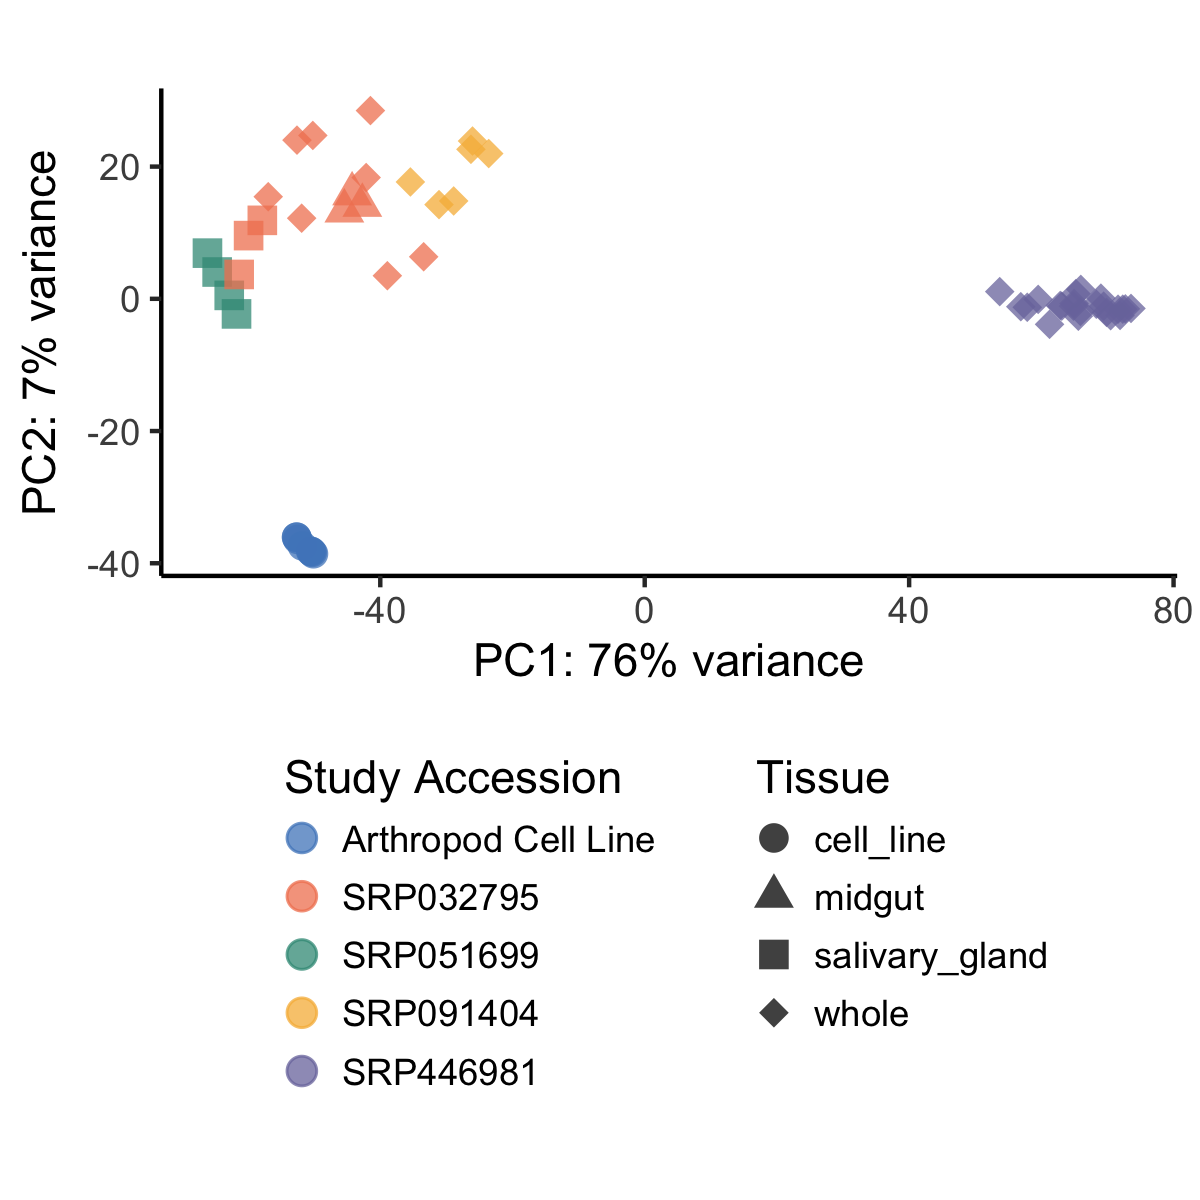

In [30]:
pcad <- plotPCA(vsd, intgroup = c("study_accession", "tissue", "sex"), returnData=TRUE)
percentVar <- round(100 * attr(pcad, "percentVar"))

pca_plt <- ggplot(pcad, aes(PC1, PC2, color=study_accession, shape = tissue)) +
  geom_point(size=3, alpha = 0.75) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) + 
  coord_fixed() +
  theme_classic() +
  theme(legend.position = "bottom",
        legend.title.position = "top",
        legend.key.size = unit(0.1, "cm"))+
  guides(color = guide_legend(nrow = 5, byrow = TRUE),
         shape = guide_legend(nrow = 4)) +
  scale_shape_manual(values=c(16, 17, 15, 18)) +
  scale_color_manual(values = accent_v2[1:5]) +
  labs(color = "Study Accession", shape = "Tissue")

pca_plt

In [32]:
pdf("figures/pca.pdf", height = 4, width = 4)
pca_plt
dev.off()

pdf 
  2

In [31]:
#png("figures/pca.png", res = 300, height = 6, width = 6, units = "in")
#pca_plt
#dev.off()

width_in_inches <- 4 # corresponds to 1200 pixels at 300 dpi
height_in_inches <- 4 # keeps the aspect ratio

png(filename = "figures/pca.png", 
    width = width_in_inches, 
    height = height_in_inches, 
    units = "in", 
    res = 300, 
    type = "cairo-png")  # Using Cairo for better font rendering
pca_plt
dev.off()


pdf 
  2

In [33]:
svg("figures/pca.svg", height = 4, width = 4)
pca_plt
dev.off()

pdf 
  2

In [34]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/taylorreiter/miniconda3/envs/tidyjupyter/lib/libopenblasp-r0.3.26.dylib;  LAPACK version 3.12.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] DESeq2_1.42.0               SummarizedExperiment_1.32.0
 [3] Biobase_2.62.0              MatrixGenerics_1.14.0      
 [5] matrixStats_1.3.0           GenomicRanges_1.54.1       
 [7] GenomeInfoDb_1.38.1         IRanges_2.36.0             
 [9] S4Vectors_0.40.2            BiocGenerics_0.48.1        
[11] lubridate_1.9.3             forcats_1.0.0              
[13] stringr_1.5.1               dplyr_1.1.4                
[15] purrr_1.0.2                 readr_2.1.5       